# EDA and Data Cleaning for Room Occupancy Estimation

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
# Load the data
ro_data = pd.read_csv('../Occupancy_Estimation.csv')
ro_data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [52]:
# Check for null values
ro_data.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [53]:
# Combine Date and Time columns into a Datetime column
ro_data['Datetime'] = pd.to_datetime(ro_data['Date'] + ' ' + ro_data['Time'])
ro_data.head()


,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Datetime
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1,2017-12-22 10:49:41
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1,2017-12-22 10:50:12
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1,2017-12-22 10:50:42
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1,2017-12-22 10:51:13
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1,2017-12-22 10:51:44


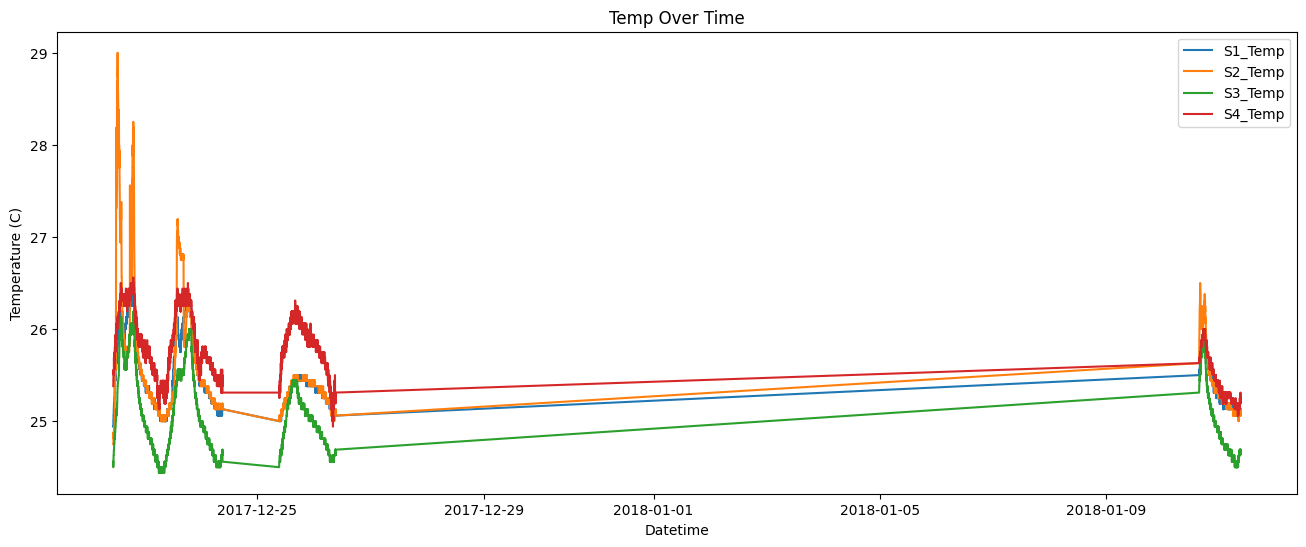

In [54]:
# Visualize temperature readings for each sensor
plt.figure(figsize=(16, 6))
plt.plot(ro_data['Datetime'], ro_data[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp']], label=['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp'])
plt.title('Temp Over Time')
plt.xlabel('Datetime')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()

In [63]:
# There are gaps in the data where readings were stopped/started, so group them so we can look at them separately
ro_data['time_diff'] = ro_data['Datetime'].diff()
ro_data['is_large_gap'] = ro_data['time_diff'] > pd.Timedelta(hours=1)
ro_data['group'] = ro_data['is_large_gap'].cumsum() + 1

group_1 = ro_data[ro_data['group'] == 1]
group_2 = ro_data[ro_data['group'] == 2]
group_3 = ro_data[ro_data['group'] == 3]

print('Length of group 1: {}'.format(len(group_1)))
print('Length of group 2: {}'.format(len(group_2)))
print('Length of group 3: {}'.format(len(group_3)))

Length of group 1: 5305
Length of group 2: 2779
Length of group 3: 2045


In [64]:
group_1.tail()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Datetime,time_diff,is_large_gap,group
5300,2017/12/24,09:08:47,25.13,25.13,24.69,25.44,7,7,36,24,...,0.07,360,-7.692308e-03,0,0,0,2017-12-24 09:08:47,0 days 00:00:31,False,1
5301,2017/12/24,09:09:18,25.13,25.13,24.69,25.44,7,7,36,24,...,0.07,360,1.153846e-02,0,0,0,2017-12-24 09:09:18,0 days 00:00:31,False,1
5302,2017/12/24,09:09:48,25.13,25.13,24.69,25.50,7,7,36,24,...,0.06,360,3.076923e-02,0,0,0,2017-12-24 09:09:48,0 days 00:00:30,False,1
5303,2017/12/24,09:10:19,25.13,25.13,24.69,25.44,7,7,37,24,...,0.07,360,-2.463364e-17,0,0,0,2017-12-24 09:10:19,0 days 00:00:31,False,1
5304,2017/12/24,09:10:50,25.13,25.13,24.56,25.31,7,7,35,24,...,0.10,355,-8.076923e-02,0,0,0,2017-12-24 09:10:50,0 days 00:00:31,False,1


In [65]:
group_2.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Datetime,time_diff,is_large_gap,group
5305,2017/12/25,09:11:42,25.00,25.00,24.50,25.31,7,7,36,24,...,0.09,355,-0.111538,0,0,0,2017-12-25 09:11:42,1 days 00:00:52,True,2
5306,2017/12/25,09:12:12,25.00,25.06,24.56,25.31,7,7,36,24,...,0.10,355,-0.138462,0,0,0,2017-12-25 09:12:12,0 days 00:00:30,False,2
5307,2017/12/25,09:12:43,25.00,25.00,24.56,25.38,7,7,36,24,...,0.11,355,-0.161538,0,0,0,2017-12-25 09:12:43,0 days 00:00:31,False,2
5308,2017/12/25,09:13:13,25.00,25.00,24.56,25.31,7,7,36,24,...,0.10,355,-0.180769,0,0,0,2017-12-25 09:13:13,0 days 00:00:30,False,2
5309,2017/12/25,09:13:44,25.06,25.00,24.50,25.31,7,7,36,24,...,0.10,355,-0.196154,0,0,0,2017-12-25 09:13:44,0 days 00:00:31,False,2


In [66]:
group_2.tail()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Datetime,time_diff,is_large_gap,group
8079,2017/12/26,09:07:58,25.06,25.06,24.69,25.25,6,7,34,22,...,0.10,350,0.0,0,0,0,2017-12-26 09:07:58,0 days 00:00:31,False,2
8080,2017/12/26,09:08:29,25.06,25.06,24.69,25.25,6,7,34,22,...,0.09,350,0.0,0,0,0,2017-12-26 09:08:29,0 days 00:00:31,False,2
8081,2017/12/26,09:08:59,25.06,25.06,24.69,25.25,6,7,34,22,...,0.10,350,0.0,0,0,0,2017-12-26 09:08:59,0 days 00:00:30,False,2
8082,2017/12/26,09:09:30,25.06,25.06,24.63,25.25,6,7,34,22,...,0.09,350,0.0,0,0,0,2017-12-26 09:09:30,0 days 00:00:31,False,2
8083,2017/12/26,09:10:01,25.06,25.06,24.69,25.31,6,7,34,22,...,0.11,350,0.0,0,0,0,2017-12-26 09:10:01,0 days 00:00:31,False,2


In [67]:
group_3.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Datetime,time_diff,is_large_gap,group
8084,2018/01/10,15:25:48,25.5,25.63,25.31,25.63,10,11,56,35,...,0.24,370,0.184615,1,1,3,2018-01-10 15:25:48,15 days 06:15:47,True,3
8085,2018/01/10,15:26:19,25.5,25.63,25.31,25.63,10,12,56,35,...,0.09,370,0.353846,0,1,3,2018-01-10 15:26:19,0 days 00:00:31,False,3
8086,2018/01/10,15:26:49,25.5,25.69,25.38,25.69,10,12,56,36,...,0.08,370,0.507692,0,0,3,2018-01-10 15:26:49,0 days 00:00:30,False,3
8087,2018/01/10,15:27:20,25.5,25.69,25.38,25.63,10,12,57,36,...,0.09,370,0.646154,0,1,3,2018-01-10 15:27:20,0 days 00:00:31,False,3
8088,2018/01/10,15:27:51,25.5,25.69,25.31,25.63,10,11,57,36,...,0.09,370,0.769231,1,0,3,2018-01-10 15:27:51,0 days 00:00:31,False,3


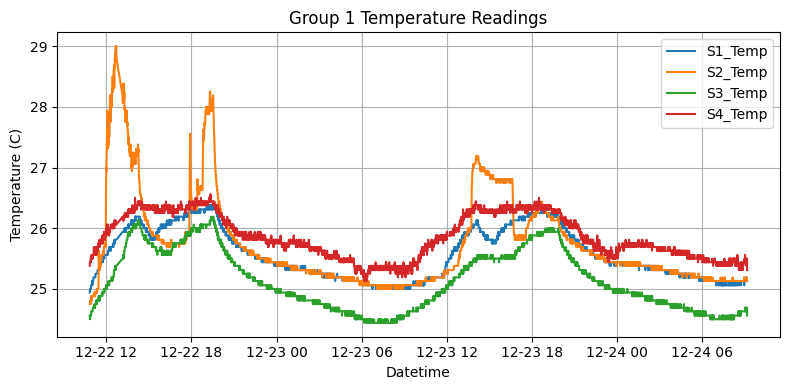

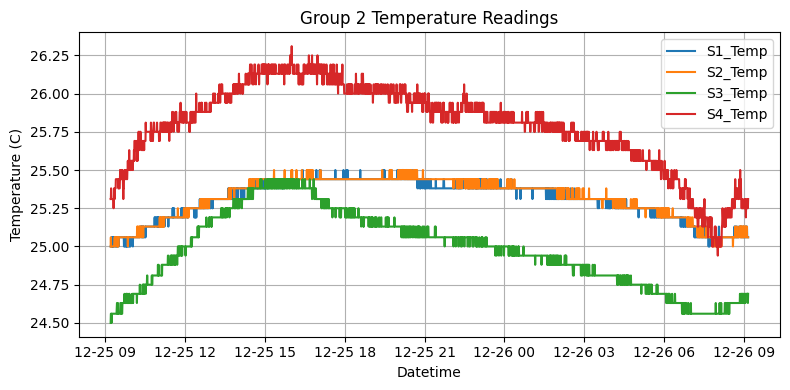

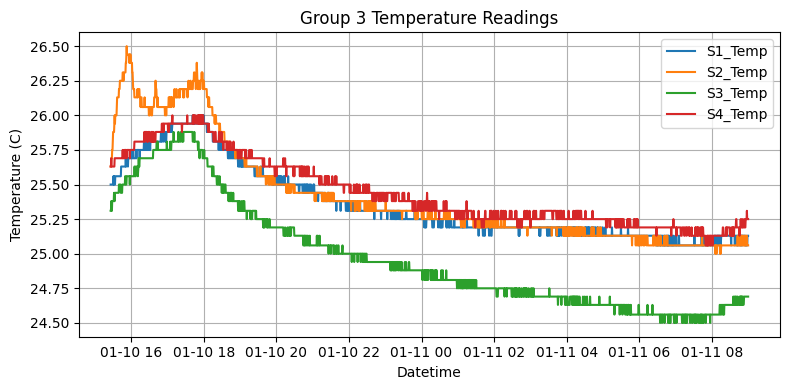

In [74]:
groups = [group_1, group_2, group_3]

# Visualize Temperature for each group of readings
for i, group in enumerate(groups):
    plt.figure(figsize=(8, 4))
    plt.plot(group['Datetime'], group[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp']], label=['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp'])
    plt.title(f'Group {i+1} Temperature Readings')
    plt.xlabel('Datetime')
    plt.ylabel('Temperature (C)')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

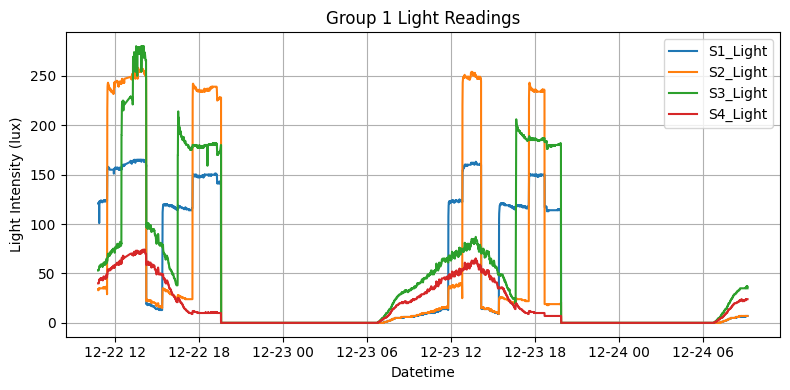

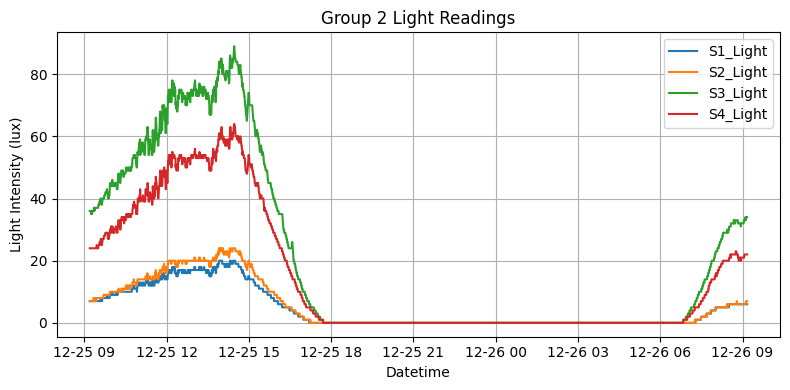

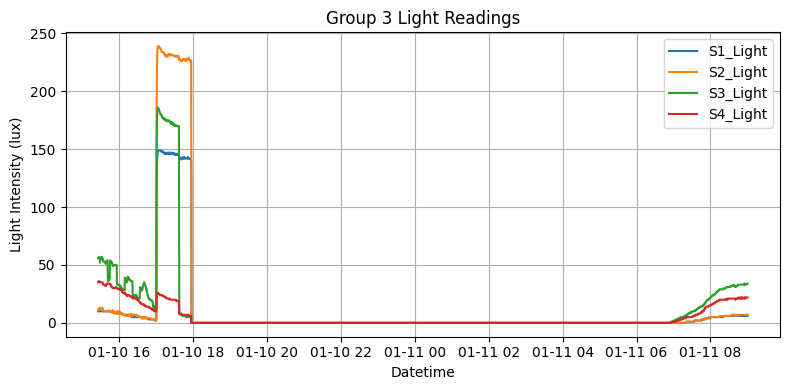

In [75]:
# Visualize light readings
for i, group in enumerate(groups):
    plt.figure(figsize=(8, 4))
    plt.plot(group['Datetime'], group[['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light']], label=['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light'])
    plt.title(f'Group {i+1} Light Readings')
    plt.xlabel('Datetime')
    plt.ylabel('Light Intensity (lux)')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

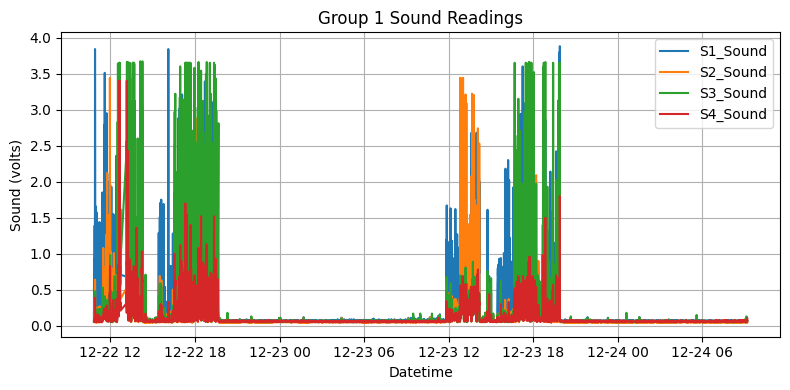

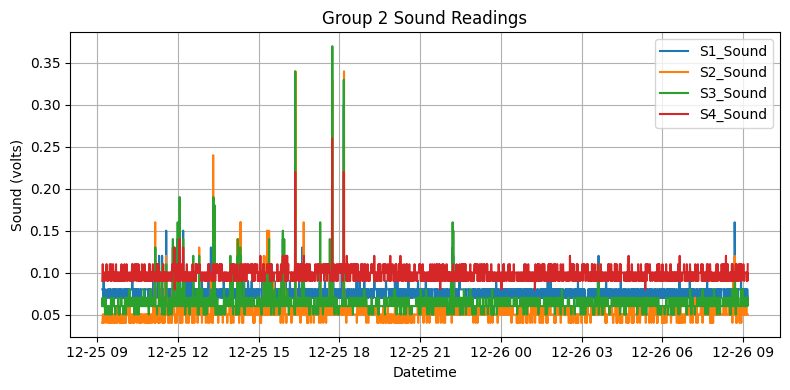

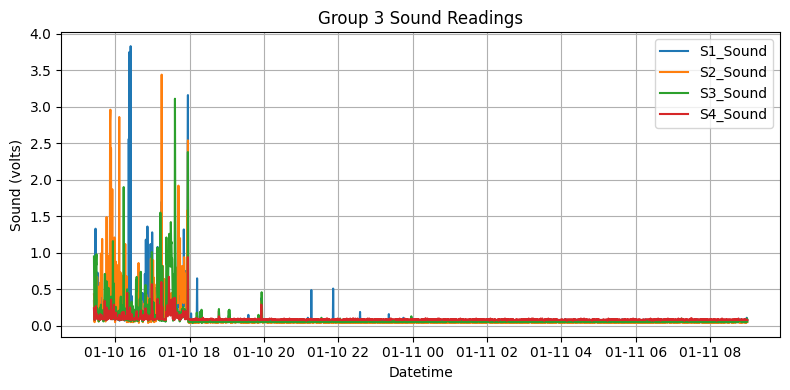

In [76]:
# Visualize sound readings
for i, group in enumerate(groups):
    plt.figure(figsize=(8, 4))
    plt.plot(group['Datetime'], group[['S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound']], label=['S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound'])
    plt.title(f'Group {i+1} Sound Readings')
    plt.xlabel('Datetime')
    plt.ylabel('Sound (volts)')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

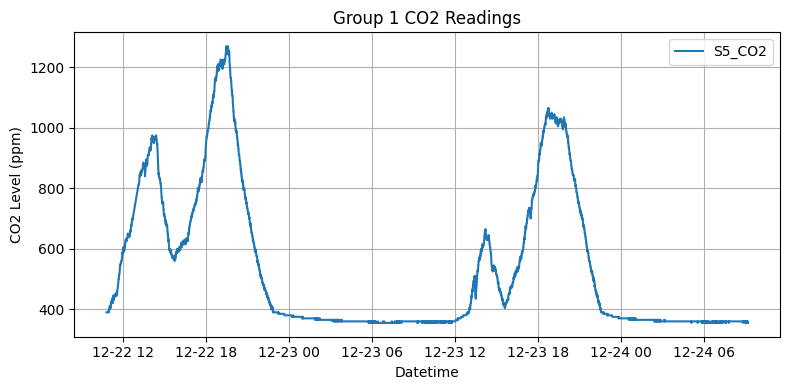

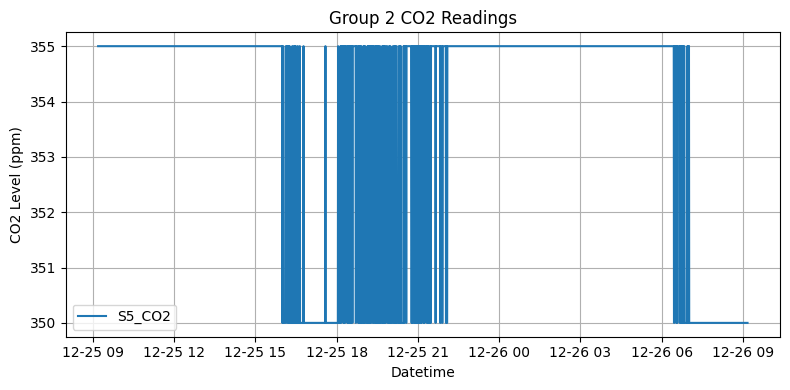

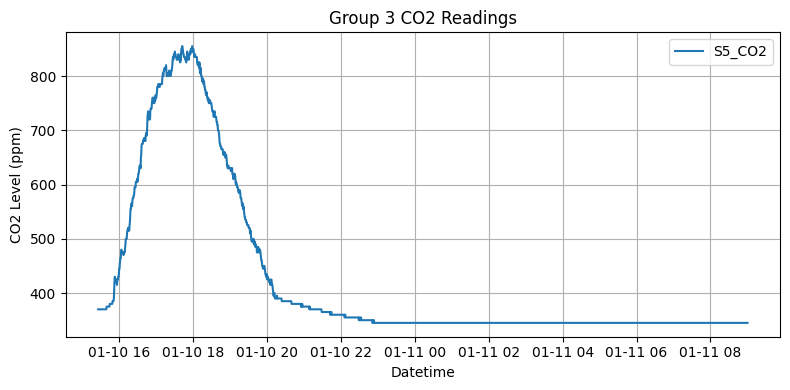

In [78]:
# Visualize CO2 readings
for i, group in enumerate(groups):
    plt.figure(figsize=(8, 4))
    plt.plot(group['Datetime'], group[['S5_CO2']], label=['S5_CO2'])
    plt.title(f'Group {i+1} CO2 Readings')
    plt.xlabel('Datetime')
    plt.ylabel('CO2 Level (ppm)')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

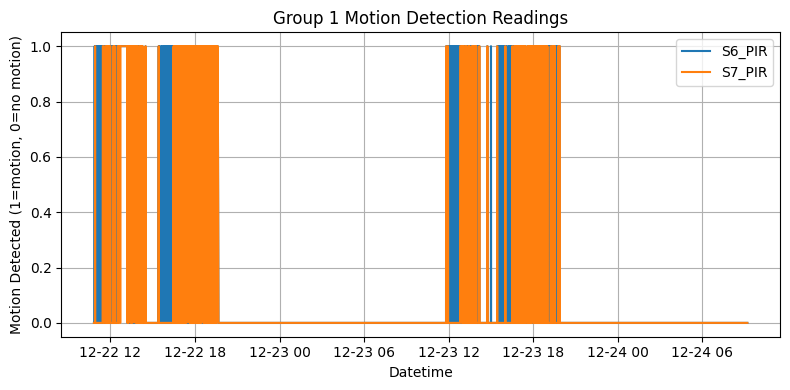

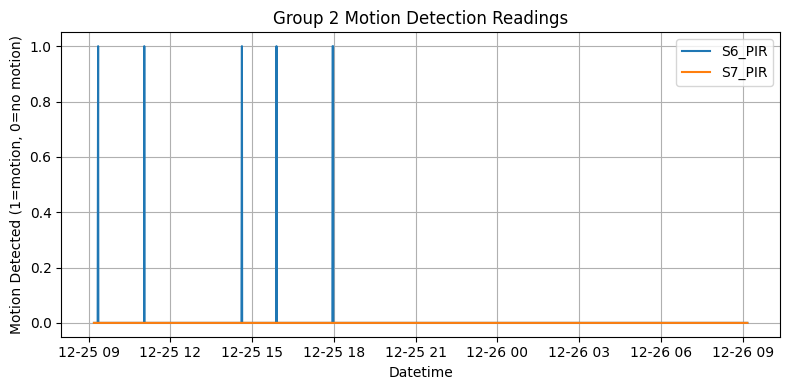

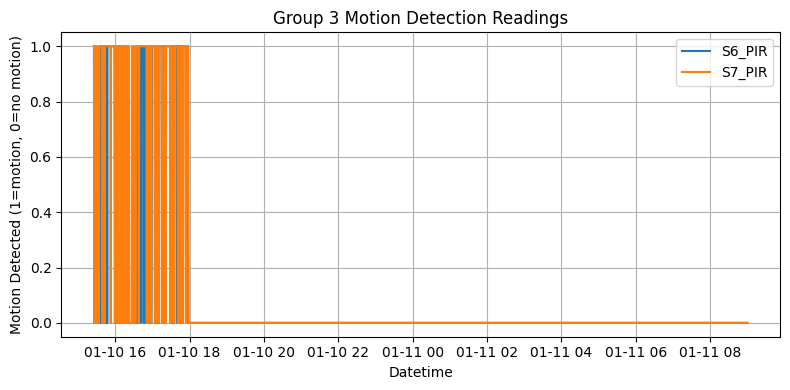

In [80]:
# Visualize motion detection
for i, group in enumerate(groups):
    plt.figure(figsize=(8, 4))
    plt.plot(group['Datetime'], group[['S6_PIR', 'S7_PIR']], label=['S6_PIR', 'S7_PIR'])
    plt.title(f'Group {i+1} Motion Detection Readings')
    plt.xlabel('Datetime')
    plt.ylabel('Motion Detected (1=motion, 0=no motion)')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

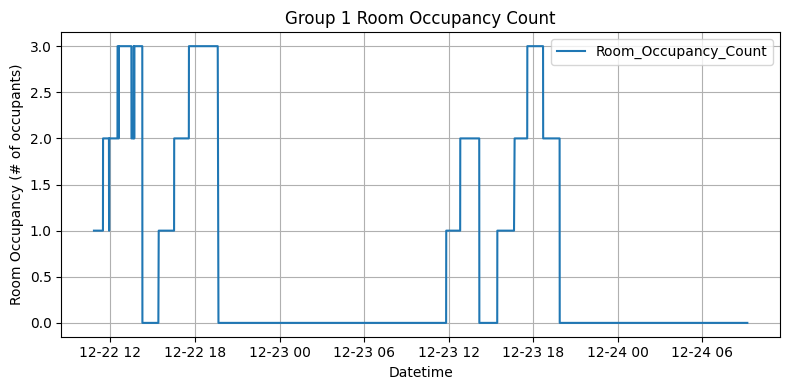

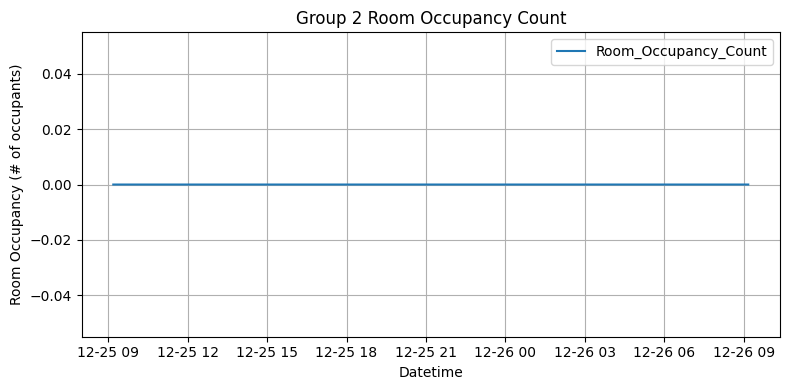

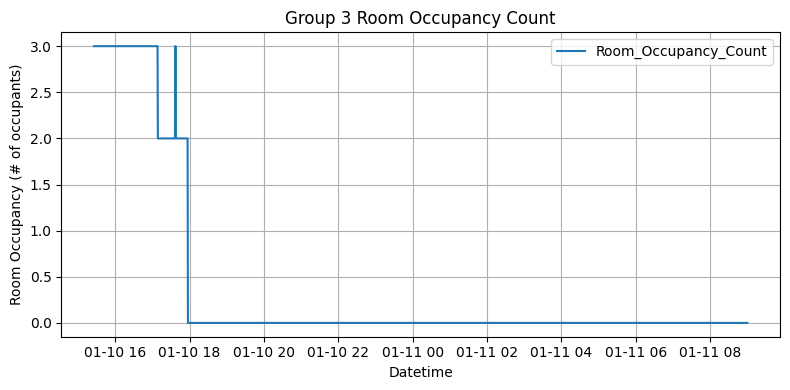

In [79]:
# Visualize room occupancy
for i, group in enumerate(groups):
    plt.figure(figsize=(8, 4))
    plt.plot(group['Datetime'], group[['Room_Occupancy_Count']], label=['Room_Occupancy_Count'])
    plt.title(f'Group {i+1} Room Occupancy Count')
    plt.xlabel('Datetime')
    plt.ylabel('Room Occupancy (# of occupants)')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()